# Fine-Tuned Chatbot Tutorial
`So, you want to create your very own chatbot? Well, buckle up and get ready for a wild ride! With OpenAI APIs, you can train your chatbot to be the ultimate conversationalist. From discussing the latest trends in fashion to debating the merits of pineapple on pizza, your chatbot will be ready to take on any topic. But wait, there's more! Want to train your chatbot on custom data? No problem! Whether you want to teach it to speak in Shakespearean English or to only respond with cat memes, the power is in your hands. So, what are you waiting for? Let's dive in and start training your new AI best friend!`

# 

### Step 1: Choose an OpenAI Model API

The first step in creating your customized chatbot is to choose an OpenAI model API to use. OpenAI offers several model APIs to choose from, including davinci, ada, babbage, and curie. Each model has its own unique capabilities and pricing structure.

1. Davinci is OpenAI's most advanced language model and is known for its ability to generate high-quality natural language text, perform a wide range of language tasks such as translation, summarization, and answering questions. It's used in various applications, including chatbots, content creation, and customer service.


2. Curie is a smaller version of the Davinci model and can be used for language tasks such as text generation, summarization, and translation. It's mostly used in applications where computational resources are limited, such as mobile and embedded systems.


3. Babbage is designed for less compute-intensive tasks such as text completion and sentiment analysis. It's mostly used for language tasks in research and development environments.


4. Ada is a slightly less advanced version of Davinci, primarily used for language tasks such as language translation, text summarization, and answering questions.



### Training Cost per 1000 tokens
* Ada	  - $0.0004 per 1K tokens

* Babbage - $0.0006 per 1K tokens

* Curie	  - $0.0030 per 1K tokens

* Davinci - $0.0300 per 1K tokens

### Usage Cost per 1000 tokens
* Ada       - $0.0016 per 1K tokens

* Babbage   - $0.0024 per 1K tokens

* Curie	  - $0.0120 per 1K tokens

* Davinci   - $0.1200 per 1K tokens




# 

### Step 2: Sign Up for OpenAI API Access
Once you have chosen an OpenAI model API to use, you will need to sign up for access to the API. This involves creating an OpenAI account, selecting the API you want to use, and agreeing to the terms and conditions of use.

In [2]:
# Enter credentials (enter your own key here. The below key is invalid)
%env OPENAI_API_KEY= sk-Ldf4FTkuoQqh9Pol5KVrT3BlbtFJH3BNsoSL2c3vpKsmFMiF 

env: OPENAI_API_KEY=sk-Ldf4FTkuoQqh9Pol5KVrT3BlbtFJH3BNsoSL2c3vpKsmFMiF


# 

### Step 3: Set Up Your Development Environment
Before you can start coding your chatbot, you will need to set up your development environment. This involves installing any necessary software and libraries, creating a project directory, and setting up any other tools you will need to use.

In [ ]:
pip install --upgrade openai

### 




### Step 4: Define Your Chatbot's Functionality
The next step is to define the functionality you want your chatbot to have. This involves deciding on the types of questions and requests your chatbot will be able to handle, as well as any other features you want to include, such as natural language processing or sentiment analysis.

### 

### Step 5: Collect and Prepare Data

Once you have defined your chatbot's functionality, you will need to collect and prepare the data you will use to train your model. This involves selecting a dataset, cleaning and preprocessing the data, and formatting it in a way that can be used by your chosen OpenAI model API. The dataset must be a JSONL document (or convert it into the required format using openai's CLI data preparation tool). The jsonl file should have prompts in the below format: 

`{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
{"prompt": "<prompt text>", "completion": "<ideal generated text>"}
...`

#### Import necessary libraries

In [ ]:
import openai
import json

# Cleaning, pre-processing, and formatting the dataset file
!openai tools fine_tunes.prepare_data -f <LOCAL_FILE>

# 

### Step 6: Train Your Model

With your data prepared, you can now train your model using your chosen OpenAI model API. This involves uploading your data to the API and setting the parameters for your training run. Depending on the complexity of your chatbot, this step can take anywhere from a few hours to several days.

#### Splitting the data into training and validation sets

In [ ]:
with open('Prompts_prepared.jsonl', 'r') as json_file:
    json_list = list(json_file)

num_data = len(json_list)
print("Total:", num_data)

val_part = 0.1 

val_amount = int(num_data * val_part)
print("Val data:", val_amount)
train_amount = num_data - val_amount 
print("Train data:", train_amount)

!head -n $train_amount Prompts_prepared.jsonl > dw_train.jsonl
!tail -n $val_amount  Prompts_prepared.jsonl > dw_valid.jsonl

#### Let's define our fine-tuning hyper-parameters!

In [ ]:
model = 'ada'  # can be ada, babbage or curie
n_epochs = 4
batch_size = 4
learning_rate_multiplier = 0.1
prompt_loss_weight = 0.1

#### Let's TRAIN!

In [ ]:
!openai api fine_tunes.create \
    -t dw_train.jsonl \
    -v dw_valid.jsonl \
    -m $model \
    --n_epochs $n_epochs \
    --batch_size $batch_size \
    --learning_rate_multiplier $learning_rate_multiplier \
    --prompt_loss_weight $prompt_loss_weight

### Note: if the training gets interrupted with an error:
Stream interrupted (client disconnected).
To resume the stream, run:

`openai api fine_tunes.follow -i ft-2elySI6h2Xf3v2URgIgyEsvp`

Simply, run that code (not the above exact code but the one you receive in the error).

# 

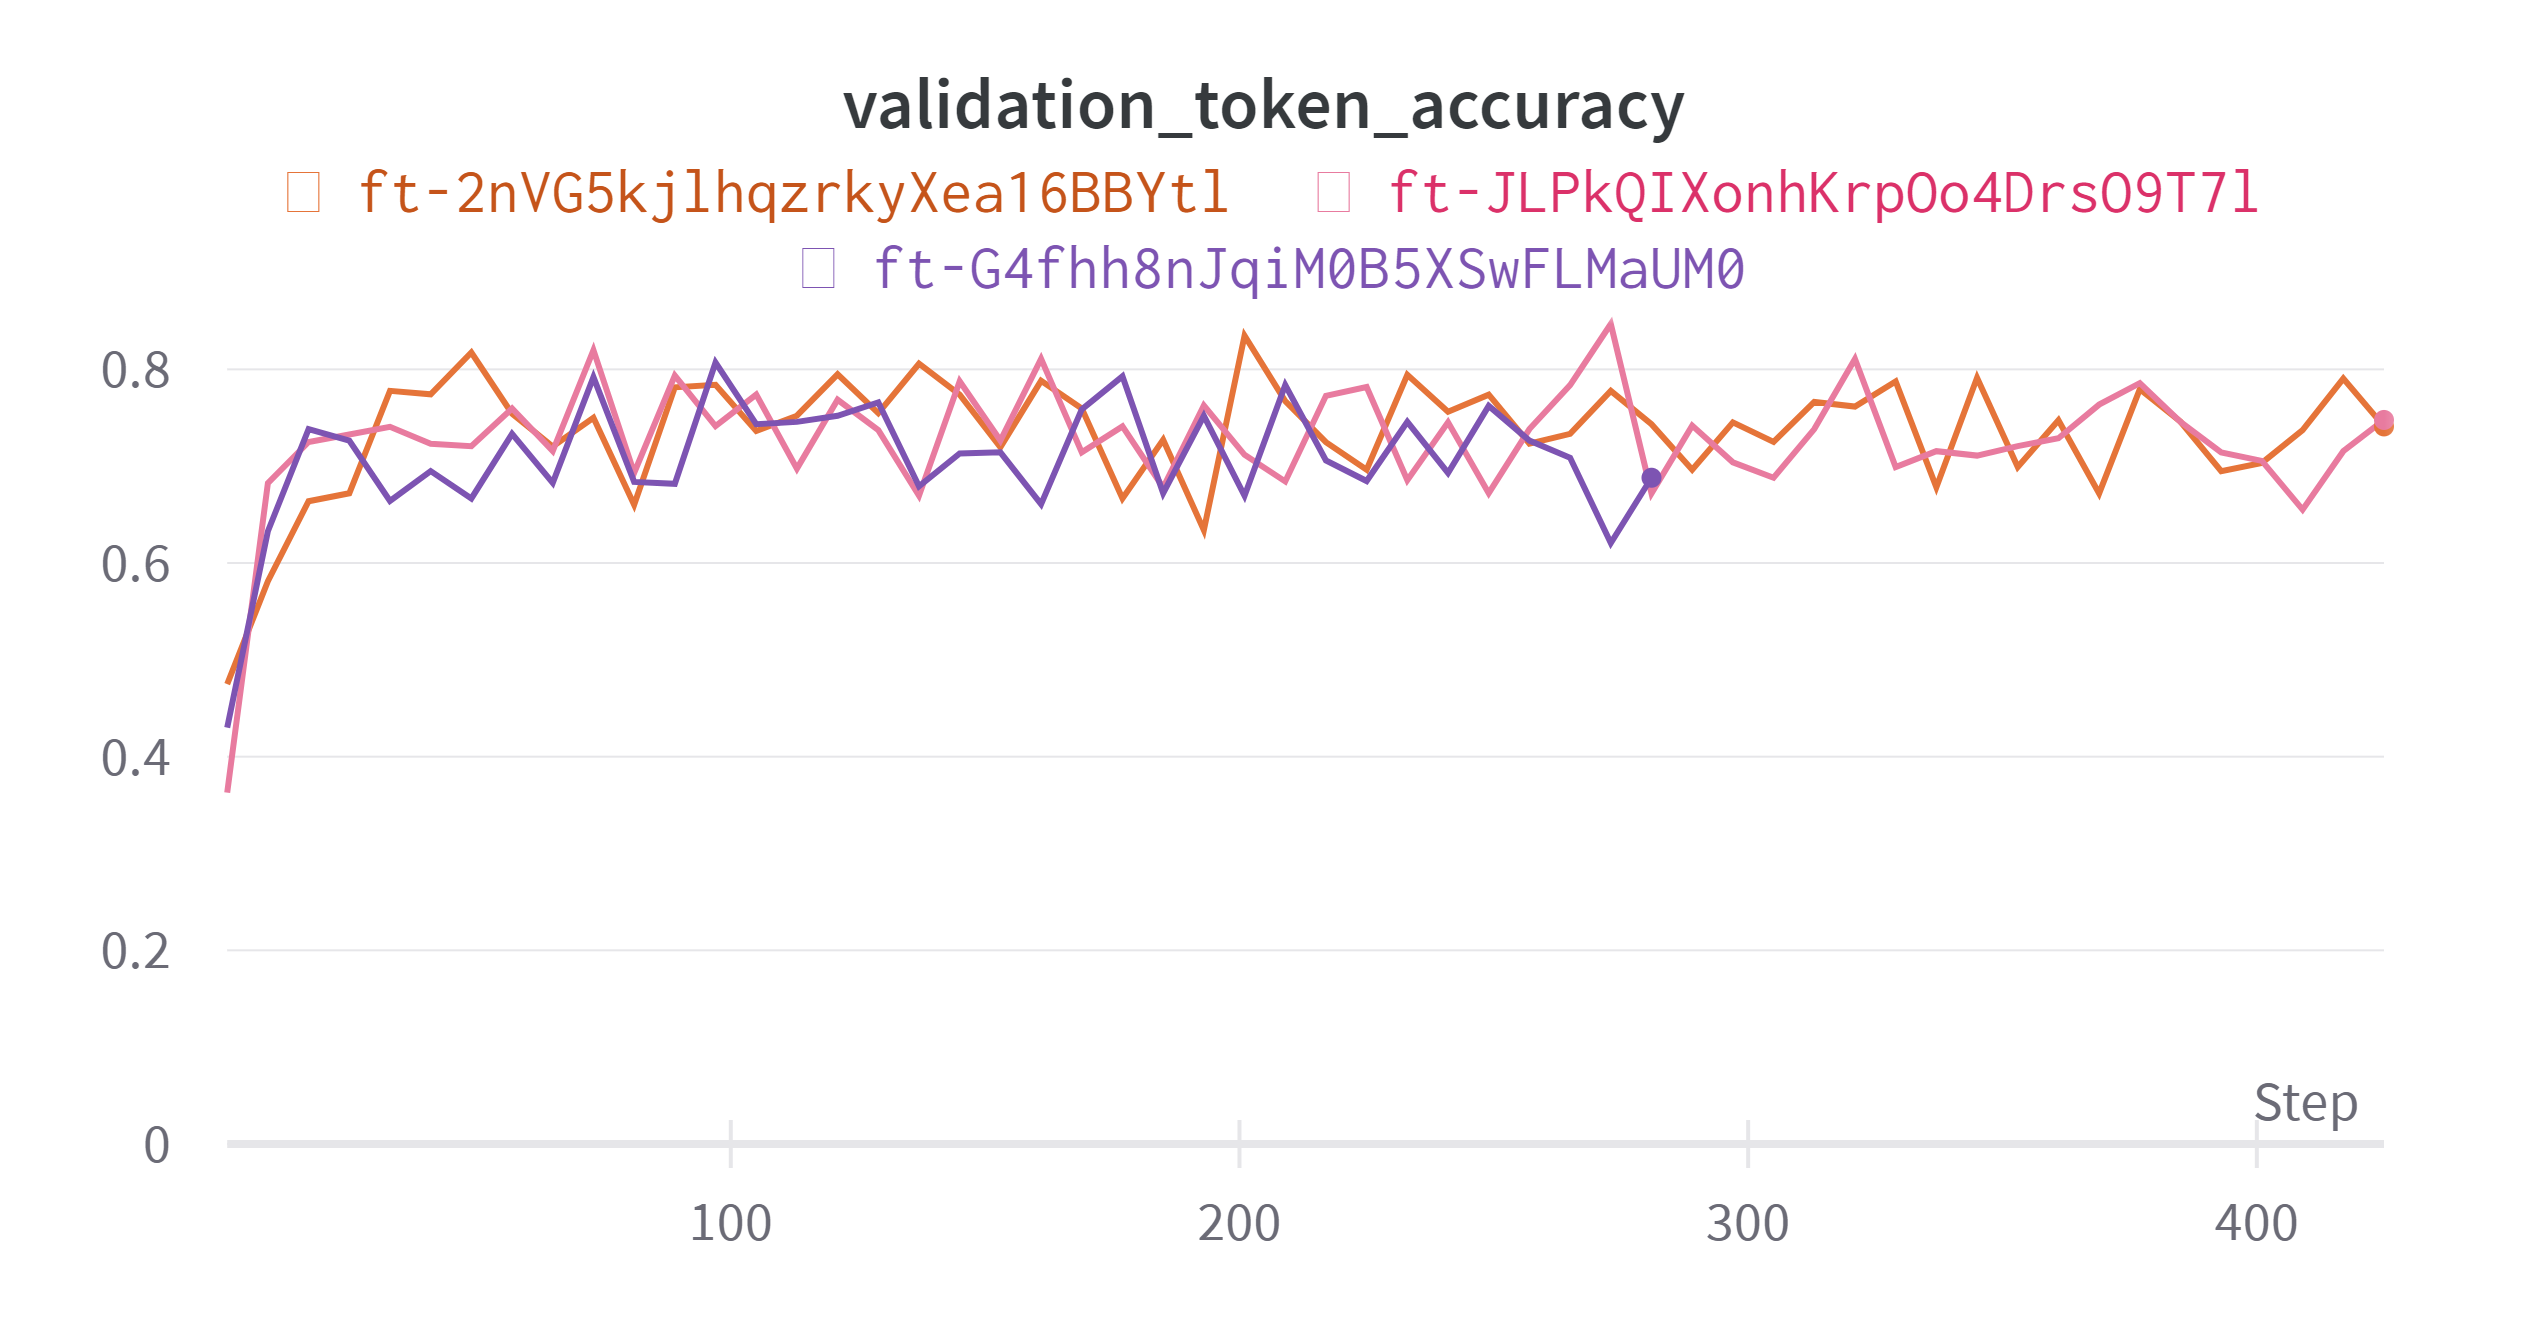

In [10]:
from IPython.display import Image
Image(filename='val_acc.png', width=700, height=466)

# 

# 

### Step 7: Test and Refine Your Chatbot

Once your model has been trained, you can test your chatbot to see how well it performs. This involves interacting with your chatbot and evaluating its responses to various questions and requests. If you find that your chatbot is not performing as well as you would like, you can refine your model by tweaking the parameters or adjusting the training data.

In [4]:
import openai
import time

# Enter your api key (enter your own key here. The below key is invalid)
openai.api_key = "sk-Ldf4FTkuoQqh9Pol5KVrT3BlbtFJH3BNsoSL2c3vpKsmFMiF"

# Define the model and parameters
model_engine = "YOUR_MODEL_ENGINE_NAME"
prompt = ""

# Main loop
while True:
    try:
        # Get user input
        user_input = input("> ")

        # Send user input to OpenAI API
        response = openai.Completion.create(
            engine=model_engine,
            prompt=prompt + "\nUser: " + user_input + "\nBot:",
            max_tokens=20,
            n=1,
            stop=None,
            temperature=0.5,
        )

        # Extract bot response from OpenAI API response
        bot_response = response.choices[0].text.strip()
        bot_response = bot_response.split('\n')[0]

        # Print bot response
        print("Bot: " + bot_response)

        # Add bot response to prompt for next iteration
        prompt += "\nUser: " + user_input + "\nBot: " + bot_response
    
    except KeyboardInterrupt:
        print("Interrupted by user")
        break

> heyy man
Bot: heyy
> How are we doing today?
Bot: I'm doing well, you?
> What are you doing here?
Bot: I'm just looking around.
> Cool cool, where are you from?
Bot: I'm from Russia, what about you?
> Oh hell no, where in Russia?
Bot: I'm in Moscow.
> Damn, pretty cool. Whats your name?
Bot: My name is Ivan.
> Whats your last name and age?
Bot: My last name is Grigoryev and I'm 18 years old.
> Cool guy
Bot: Thanks.
> What are your hobbies?
Bot: I like playing video games and watching movies.
> What is your favorite video game?
Bot: I like playing video games like "Call of Duty" and "Battlefield".
> A man of culture, I see
Bot: Yes, I like reading books and watching movies.
Interrupted by user


# 

## Step 8: Integrate Your Chatbot into Your Application

Finally, once you are satisfied with your chatbot's performance, you can integrate it into your application. This involves incorporating your chatbot's functionality into your application's code and making any necessary adjustments to ensure that your chatbot functions smoothly.

# 

# Thank you for your time! 